<a href="https://colab.research.google.com/github/raviS123-dot/hand-written-number-prediction-using-NN-tensorflow/blob/main/Mnist_number_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


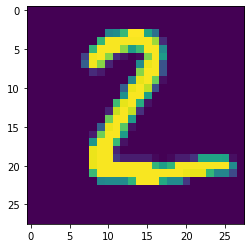

In [ ]:
plt.imshow(x_test[1])
plt.show()

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)

In [ ]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32, num_shape=32):
        super(Linear, self).__init__()
        self.units = units
        self.num_shape= num_shape

    def build(self, input_shape):
        self.w = self.add_weight(shape=(self.num_shape, self.units), initializer="random_normal",trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer="random_normal", trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


In [ ]:
class MLPBlock(keras.layers.Layer):
    def __init__(self):
        super(MLPBlock, self).__init__()
        self.linear_1 = Linear(128, 784)
        self.linear_2 = Linear(128, 128)
        self.linear_3 = Linear(10, 128)

    def call(self, inputs):
        x = tf.nn.relu(self.linear_1(inputs))
        y = tf.nn.relu(self.linear_2(x))
        #z = tf.nn.relu(self.linear_3(y))
        return tf.nn.softmax(self.linear_3(y))

In [ ]:
# A layer that creates an activity regularization loss
class ActivityRegularizationLayer(keras.layers.Layer):
    def __init__(self, rate=1e-2):
        super(ActivityRegularizationLayer, self).__init__()
        self.rate = rate

    def call(self, inputs):
        self.add_loss(self.rate * tf.reduce_sum(inputs))
        return inputs

In [ ]:
x_train = x_train.reshape((60000, 784))
input = tf.keras.Input(shape=(784,))
output_layer = MLPBlock()
output = output_layer(input)

In [ ]:
model = tf.keras.Model(inputs=input, outputs=output)

In [ ]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
x_test = x_test.reshape((10000, 784))

In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7573 - accuracy: 0.5375
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5721 - accuracy: 0.8415
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3988 - accuracy: 0.8863


In [ ]:

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.9023
0.3520839214324951 0.9023000001907349


In [ ]:
#model.save('num_reader')
#new_model = tf.keras.models.load_model('num_reader.model')
prediction = model.predict([x_test])

In [ ]:
import numpy as np
print(np.argmax(prediction[1]))

2
